In [1]:
#https://www.kaggle.com/datasets/thedevastator/uncovering-geophysical-insights-analyzing-usgs-e
#https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rajeshrampure/zomato-dataset

 82% 73.0M/89.0M [00:00<00:00, 110MB/s]
100% 89.0M/89.0M [00:00<00:00, 103MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/zomato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import pandas as pd
import numpy as np

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)

##**Loading The Dataset**

In [148]:
data = pd.read_csv('/content/zomato.csv')

In [149]:
print(data.shape)
data.head(2)

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [150]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

##**Dropping Uneccessary Columns**

In [151]:
data = data.drop(['menu_item','listed_in(type)'], axis=1)

##**Checking the Null Values**

In [152]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(city)                    0
dtype: int64

In [153]:
data.isnull().sum() * 100 / data.shape[0]

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
listed_in(city)                 0.000000
dtype: float64

In [154]:
nulli = data.isnull().sum().tolist()

In [155]:
coli = data.columns.tolist()

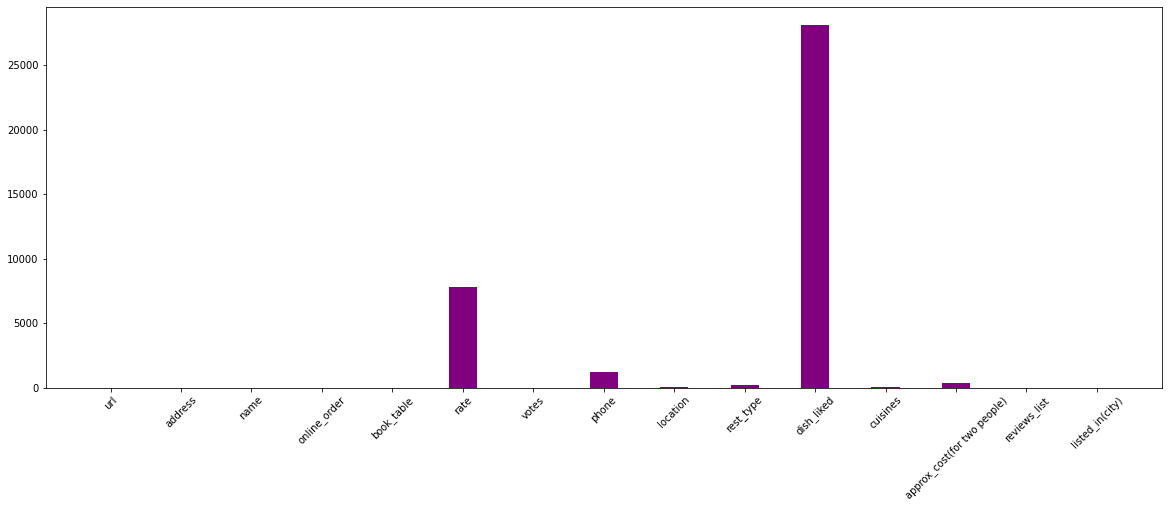

In [156]:
plt.figure(figsize = (20, 7))
 
# creating the bar plot
plt.bar(coli, nulli, color ='purple',width = 0.4)
plt.xticks(rotation = 45)
plt.show()

**More than 50% value in dish_liked column are NaN so we are dropping the entire column**

In [157]:
data = data.drop(['dish_liked'], axis=1)

**Those row that don't have phone number we are dropping them**

In [158]:
data = data.dropna(subset=['phone'])

In [159]:
# data = data.reset_index(drop=True)

**Dealing with Location**  
We will replace the location NaN value with the city provided in listed_in(city)

In [160]:
#By dropping the row for phone number the location nan value also get dropped

In [161]:
diffLoc = data['location'].unique()

In [162]:
print(diffLoc.tolist())

['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar', 'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market', 'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road', 'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram', 'Kammanahalli', 'Koramangala 6th Block', 'Majestic', 'Langford Town', 'Ce

**Dealing with Restaurant Type**  
We will replace the rest_type null value with the most frequent value available in that city

In [164]:
data[data['rest_type'].isnull()][:1]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(city)
999,https://www.zomato.com/bangalore/mughlai-kitch...,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,Yes,No,3.5/5,269,+91 9663197947\r\r\n+91 9986692090,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,"[('Rated 5.0', ""RATED\n Ordered Chicken Kadai...",Bannerghatta Road


In [113]:
restaurant_type = pd.DataFrame()

In [114]:
modirestType = data[data['location'] == 'Basavanagudi']['rest_type'].mode()
print(modirestType)

0    Quick Bites
dtype: object


In [115]:
for i in diffLoc:
  modirestType = data[data['location'] == i]['rest_type'].mode()
  valu = data[data['location'] == i][['rest_type']].fillna(modirestType.values[0])
  restaurant_type = restaurant_type.append(valu)

In [116]:
print(restaurant_type.shape)
restaurant_type.head()

(50509, 1)


,rest_type
0,Casual Dining
1,Casual Dining
2,"Cafe, Casual Dining"
3,Quick Bites
7,"Casual Dining, Cafe"


In [117]:
data['rest_type'] = restaurant_type

In [118]:
data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           7399
votes                             0
phone                             0
location                          0
rest_type                         0
cuisines                         16
approx_cost(for two people)      12
reviews_list                      0
listed_in(city)                   0
dtype: int64

In [119]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
listed_in(city)                object
dtype: object

**Dealing with Approx Cost for Two People Column**
***  
- First we have to clean the column remove the , from it
- Second We will convert the column into float
- Then we will replace the missing value with the mean of the column

In [166]:
data[['approx_cost(for two people)']].head(1)

,approx_cost(for two people)
0,800


In [120]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: [str(i.replace(",", "")) for i in str(x)])

In [121]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: ''.join(x))

In [122]:
data['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51711     800
51712    1500
51713     600
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 50509, dtype: object

In [123]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(float)

In [124]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(value=data['approx_cost(for two people)'].mean())

In [125]:
data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           7399
votes                             0
phone                             0
location                          0
rest_type                         0
cuisines                         16
approx_cost(for two people)       0
reviews_list                      0
listed_in(city)                   0
dtype: int64

**Dealing with Rate**

In [168]:
data[['rate']].head(1)

,rate
0,4.1/5


In [127]:
data['rate'] = data['rate'].apply(lambda x: str(x).split('/')[0])

In [137]:
data['rate'] = data['rate'].apply(lambda x: 0 if (x == 'NEW') or (x == '-')  else x)

In [138]:
data['rate'] = data['rate'].astype(float)

In [140]:
data['rate'] = data['rate'].fillna(value=data['rate'].mean())

In [141]:
data.isnull().sum()

url                             0
address                         0
name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
phone                           0
location                        0
rest_type                       0
cuisines                       16
approx_cost(for two people)     0
reviews_list                    0
listed_in(city)                 0
dtype: int64

**Dealing with Cuisines**

In [143]:
cuisinesdf = pd.DataFrame()

In [144]:
for i in diffLoc:
  modicusines = data[data['location'] == i]['cuisines'].mode()
  valu = data[data['location'] == i][['cuisines']].fillna(modicusines.values[0])
  cuisinesdf = cuisinesdf.append(valu)

In [145]:
print(cuisinesdf.shape)
cuisinesdf.head()

(50509, 1)


,cuisines
0,"North Indian, Mughlai, Chinese"
1,"Chinese, North Indian, Thai"
2,"Cafe, Mexican, Italian"
3,"South Indian, North Indian"
7,"Pizza, Cafe, Italian"


In [146]:
data['cuisines'] = cuisinesdf

In [147]:
data.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(city)                0
dtype: int64